<a href="https://colab.research.google.com/github/khushi168/Stock-Movement-Analysis-Bases-on-Social-Media/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [20]:
tweet_collection = pd.read_csv('data.csv', names=['ID', 'Label', 'Tweet', 'Date'], header=1)
print(tweet_collection.shape)
tweet_collection.head()

(85185, 4)


,ID,Label,Tweet,Date
0,1079985739482443778,positive,The competition wishes. This does not happen w...,2019-01-01 01:20:40
1,1079988965418110976,positive,A little late cuz I just got home but happy ne...,2019-01-01 01:33:29
2,1079990351824371712,positive,Tesla: Down to the Wire @VickiBryanBondA $TSLA...,2019-01-01 01:38:59
3,1079992268545609728,positive,"Happy Never Going Bankrupt Eve, $TSLAQ! $TSLA...",2019-01-01 01:46:36
4,1079993076511318016,positive,My 1st tweet of 2019 goes to Tesla $TSLA but I...,2019-01-01 01:49:49


In [21]:
tweet_collection['Label'].value_counts(normalize = True)

,proportion
Label,
positive,0.756703
negative,0.243297


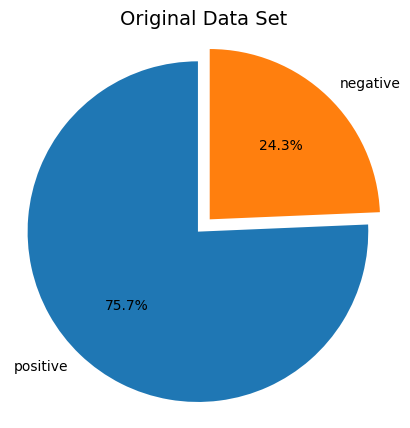

In [22]:
fig1, ax1 = plt.subplots(figsize=(5,5))

labels = ['positive', 'negative']
sizes = [len(tweet_collection[tweet_collection['Label'] == 'positive']), len(tweet_collection[tweet_collection['Label'] == 'negative'])]
explode = (0, 0.1)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')
ax1.set_title("Original Data Set", fontsize=14)

plt.show()

In [23]:
positive_comments = tweet_collection[tweet_collection['Label'] == "positive"]
negative_comments = tweet_collection[tweet_collection['Label'] == "negative"]

In [24]:
#!pip install WordCloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [25]:
sentences = tweet_collection['Tweet'].tolist()
joined_sentences = ' '.join(sentences)

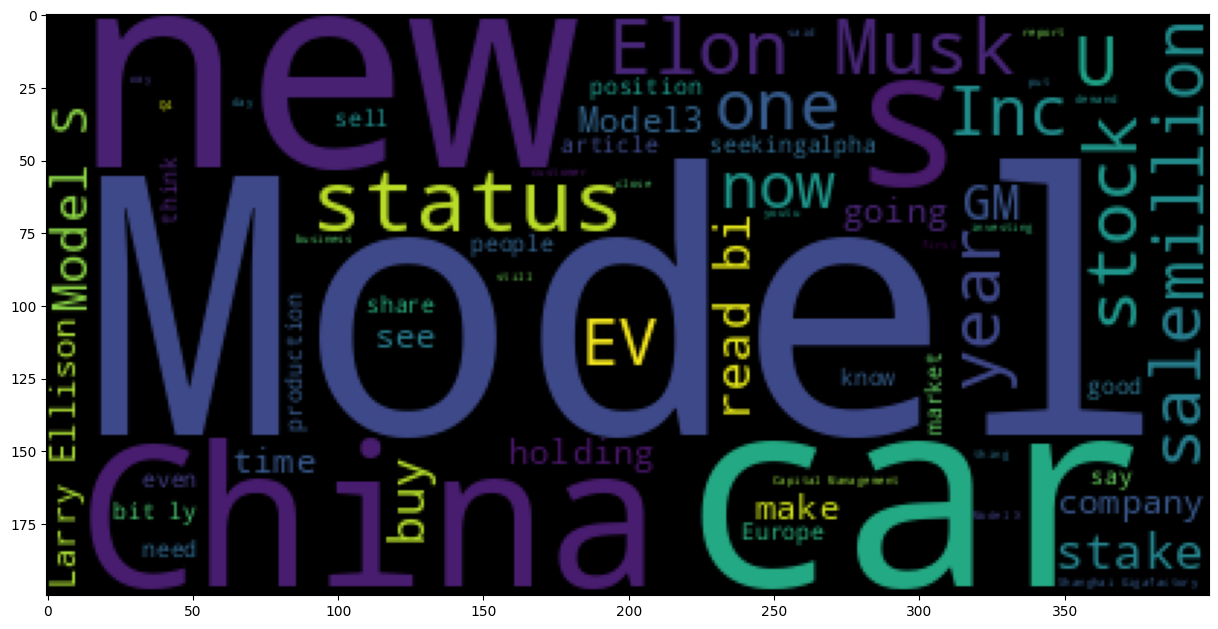

In [26]:
pos_sentences = positive_comments['Tweet'].tolist()
stop_words = ['Tesla', 'TSLA', 'twitter', 'https', 'elonmusk', 'TSLAQ', 'will', 'pic'] + list(STOPWORDS)
joined_pos_sentences = ' '.join(pos_sentences)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud(stopwords = stop_words).generate(joined_pos_sentences))

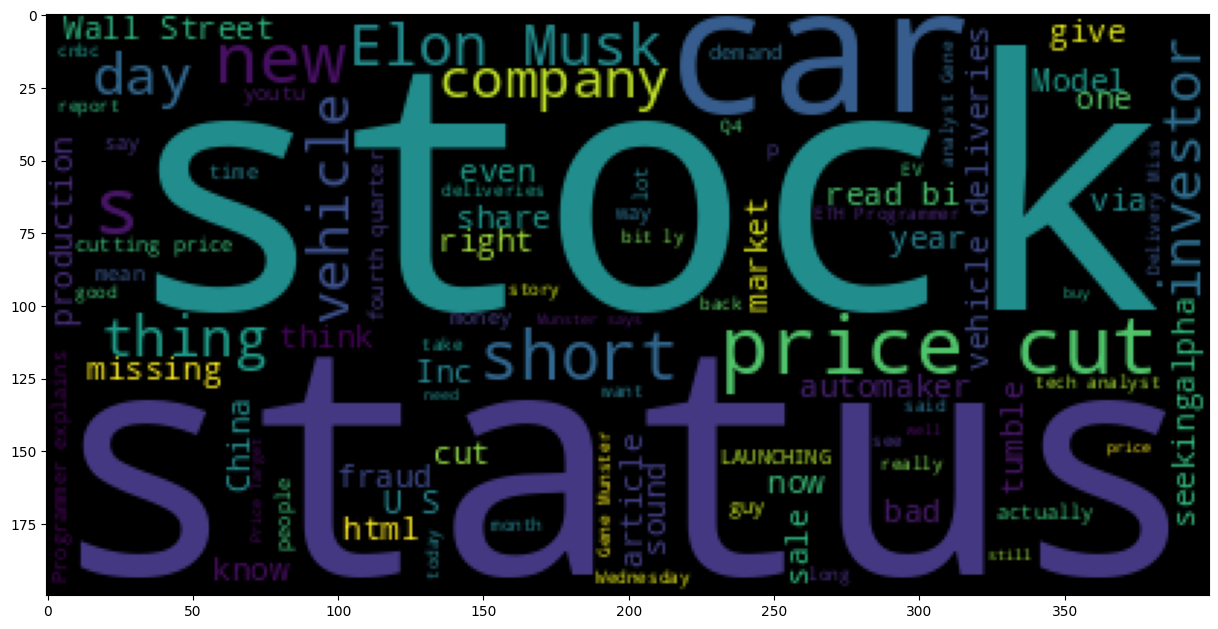

In [27]:
neg_sentences = negative_comments['Tweet'].tolist()
stop_words = ['Tesla', 'TSLA', 'twitter', 'https', 'elonmusk', 'TSLAQ', 'will', 'pic'] + list(STOPWORDS)
joined_neg_sentences = ' '.join(neg_sentences)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud(stopwords = stop_words).generate(joined_neg_sentences))

Training and Test set


In [28]:
tweet_df = tweet_collection[:5000]
randomized_collection = tweet_df.sample(frac=1, random_state=3)

training_test_index = round(len(randomized_collection) * 0.8)

training_set = randomized_collection[:training_test_index].reset_index(drop=True)
test_set = randomized_collection[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(4000, 4)
(1000, 4)


In [29]:
print(training_set['Label'].value_counts(normalize = True))
test_set['Label'].value_counts(normalize = True)

Label
positive    0.755128
negative    0.244872
Name: proportion, dtype: float64


,proportion
Label,
positive,0.763
negative,0.237


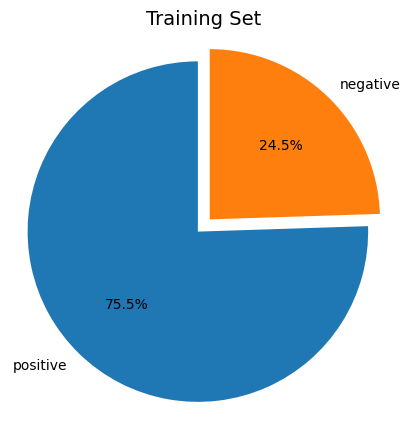

In [30]:
fig2, ax2 = plt.subplots(figsize=(5,5))

labels = ['positive', 'negative']
sizes = [len(training_set[training_set['Label'] == 'positive']), len(training_set[training_set['Label'] == 'negative'])]
explode = (0, 0.1)

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax2.axis('equal')
ax2.set_title("Training Set", fontsize=14)

plt.show()

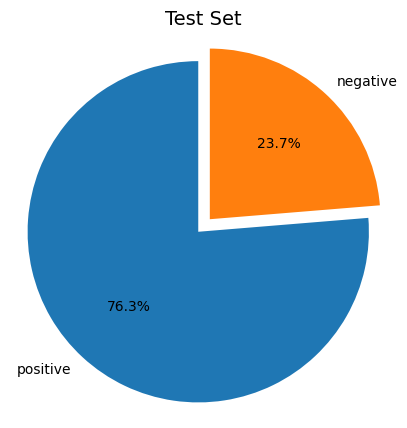

In [31]:
fig3, ax3 = plt.subplots(figsize=(5,5))

labels = ['positive', 'negative']
sizes = [len(test_set[test_set['Label'] == 'positive']), len(test_set[test_set['Label'] == 'negative'])]
explode = (0, 0.1)

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax3.axis('equal')
ax3.set_title("Test Set", fontsize=14)

plt.show()

Model Development and
Data pre-processing

In [32]:
training_set.head()

,ID,Label,Tweet,Date
0,1082561795053813762,negative,Tesla Inc $TSLA Receives $331.23 Consensus Tar...,2019-01-08 03:56:59
1,1084934178708353024,negative,$TSLA - This is a big deal for apartment rente...,2019-01-14 17:03:59
2,1085289896812691457,positive,Curious about #Tesla's next move for #ModelS. ...,2019-01-15 16:37:29
3,1083496016232529920,positive,"2019 BMW 320i Sedan Base: $40,250 Various pack...",2019-01-10 17:49:15
4,1080550582488715265,positive,Tesla's core business of selling Model S and M...,2019-01-02 14:45:09


In [33]:
training_set['Tweet'] = training_set['Tweet'].str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b',
                                          ' ')
training_set['Tweet'] = training_set['Tweet'].str.replace(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)',
                                          ' ')
training_set['Tweet'] = training_set['Tweet'].str.replace(r'£|\$', ' ')
training_set['Tweet'] = training_set['Tweet'].str.replace(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
                                          ' ')
training_set['Tweet'] = training_set['Tweet'].str.replace(r'\d+(\.\d+)?', ' ')

training_set['Tweet'] = training_set['Tweet'].str.replace(r'[^\w\d\s]', ' ')
training_set['Tweet'] = training_set['Tweet'].str.replace(r'\s+', ' ')
training_set['Tweet'] = training_set['Tweet'].str.replace(r'^\s+|\s+?$', '')

training_set['Tweet'] = training_set['Tweet'].str.lower()

In [34]:
training_set.head()

,ID,Label,Tweet,Date
0,1082561795053813762,negative,tesla inc $tsla receives $331.23 consensus tar...,2019-01-08 03:56:59
1,1084934178708353024,negative,$tsla - this is a big deal for apartment rente...,2019-01-14 17:03:59
2,1085289896812691457,positive,curious about #tesla's next move for #models. ...,2019-01-15 16:37:29
3,1083496016232529920,positive,"2019 bmw 320i sedan base: $40,250 various pack...",2019-01-10 17:49:15
4,1080550582488715265,positive,tesla's core business of selling model s and m...,2019-01-02 14:45:09


In [35]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
training_set['Tweet'] = training_set['Tweet'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in set(stop_words))
)

In [37]:
training_set.head()

,ID,Label,Tweet,Date
0,1082561795053813762,negative,tesla inc $tsla receives $331.23 consensus tar...,2019-01-08 03:56:59
1,1084934178708353024,negative,$tsla - big deal apartment renters wait jump t...,2019-01-14 17:03:59
2,1085289896812691457,positive,curious #tesla's next move #models. 75 kwh dis...,2019-01-15 16:37:29
3,1083496016232529920,positive,"2019 bmw 320i sedan base: $40,250 various pack...",2019-01-10 17:49:15
4,1080550582488715265,positive,tesla's core business selling model model x ve...,2019-01-02 14:45:09


In [38]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [39]:
training_set.head()

,ID,Label,Tweet,Date
0,1082561795053813762,negative,tesla inc $tsla receives $331.23 consensus tar...,2019-01-08 03:56:59
1,1084934178708353024,negative,$tsla - big deal apartment renters wait jump t...,2019-01-14 17:03:59
2,1085289896812691457,positive,curious #tesla's next move #models. 75 kwh dis...,2019-01-15 16:37:29
3,1083496016232529920,positive,"2019 bmw 320i sedan base: $40,250 various pack...",2019-01-10 17:49:15
4,1080550582488715265,positive,tesla's core business selling model model x ve...,2019-01-02 14:45:09


In [40]:
porter = nltk.PorterStemmer()
training_set['Tweet'] = training_set['Tweet'].apply(lambda x: ' '.join(
    porter.stem(term) for term in x.split())
)

In [41]:
training_set.head()

,ID,Label,Tweet,Date
0,1082561795053813762,negative,tesla inc $tsla receiv $331.23 consensu target...,2019-01-08 03:56:59
1,1084934178708353024,negative,$tsla - big deal apart renter wait jump tesla....,2019-01-14 17:03:59
2,1085289896812691457,positive,curiou #tesla' next move #models. 75 kwh disap...,2019-01-15 16:37:29
3,1083496016232529920,positive,"2019 bmw 320i sedan base: $40,250 variou packa...",2019-01-10 17:49:15
4,1080550582488715265,positive,tesla' core busi sell model model x vehicl hol...,2019-01-02 14:45:09


In [42]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
training_set['Tweet'] = training_set['Tweet'].apply(lambda Tweet: nltk.word_tokenize(Tweet))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [43]:
training_set.head()

,ID,Label,Tweet,Date
0,1082561795053813762,negative,"[tesla, inc, $, tsla, receiv, $, 331.23, conse...",2019-01-08 03:56:59
1,1084934178708353024,negative,"[$, tsla, -, big, deal, apart, renter, wait, j...",2019-01-14 17:03:59
2,1085289896812691457,positive,"[curiou, #, tesla, ', next, move, #, models, ....",2019-01-15 16:37:29
3,1083496016232529920,positive,"[2019, bmw, 320i, sedan, base, :, $, 40,250, v...",2019-01-10 17:49:15
4,1080550582488715265,positive,"[tesla, ', core, busi, sell, model, model, x, ...",2019-01-02 14:45:09


In [44]:
corpus = training_set['Tweet'].sum()

In [45]:
temp_set = set(corpus)
vocabulary = list(temp_set)

In [46]:
len_training_set = len(training_set['Tweet'])
word_counts_per_sms = {unique_word: [0] * len_training_set for unique_word in vocabulary}

for index, sms in enumerate(training_set['Tweet']):
    for word in sms:
        word_counts_per_sms[word][index] += 1

In [47]:
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,gene,head,insan,//finexaminer.com/2019/01/07/lasalle-investment-management-securities-decreased-position-in-taubman-centers-tco-as-stock-price-declined-mkp-capital-management-holding-in-tesla-put-tsla-boosted-as-share-value-rose/,mechan,//dlvr.it/qwdjm5,and,charg,sensation,pic.twitter.com/tsoj73ljfw,...,//www.stocknewswires.com/tsla-is-teslas-delivery-shortfall-the-real-problem/,//ow.ly/ki8x30nhebj,fully-self-driv,//www.reddit.com/r/teslamotors/comments/7zitf8/huge_fleet_of_teslas_waiting_at_the_san_francisco/,soak,//buff.ly/2qbtjq1,broad,thingi,parametr,massachusett
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
word_counts.shape

(4000, 12654)

In [49]:
training_set_final = pd.concat([training_set, word_counts], axis=1)
training_set_final.head()

,ID,Label,Tweet,Date,gene,head,insan,//finexaminer.com/2019/01/07/lasalle-investment-management-securities-decreased-position-in-taubman-centers-tco-as-stock-price-declined-mkp-capital-management-holding-in-tesla-put-tsla-boosted-as-share-value-rose/,mechan,//dlvr.it/qwdjm5,...,//www.stocknewswires.com/tsla-is-teslas-delivery-shortfall-the-real-problem/,//ow.ly/ki8x30nhebj,fully-self-driv,//www.reddit.com/r/teslamotors/comments/7zitf8/huge_fleet_of_teslas_waiting_at_the_san_francisco/,soak,//buff.ly/2qbtjq1,broad,thingi,parametr,massachusett
0,1082561795053813762,negative,"[tesla, inc, $, tsla, receiv, $, 331.23, conse...",2019-01-08 03:56:59,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1084934178708353024,negative,"[$, tsla, -, big, deal, apart, renter, wait, j...",2019-01-14 17:03:59,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1085289896812691457,positive,"[curiou, #, tesla, ', next, move, #, models, ....",2019-01-15 16:37:29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1083496016232529920,positive,"[2019, bmw, 320i, sedan, base, :, $, 40,250, v...",2019-01-10 17:49:15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1080550582488715265,positive,"[tesla, ', core, busi, sell, model, model, x, ...",2019-01-02 14:45:09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
pos_df = training_set_final[training_set_final['Label'] == 'positive'].copy()
neg_df = training_set_final[training_set_final['Label'] == 'negative'].copy()

In [51]:
p_pos = pos_df.shape[0] / training_set_final.shape[0]
p_neg = neg_df.shape[0] / training_set_final.shape[0]

In [52]:
pos_words_per_tweet = pos_df['Tweet'].apply(len)
n_pos = pos_words_per_tweet.sum()

neg_words_per_tweet = neg_df['Tweet'].apply(len)
n_neg = neg_words_per_tweet.sum()

n_vocabulary = len(vocabulary)


In [53]:
alpha = 1

In [54]:
parameters_pos = {unique_word: 0 for unique_word in vocabulary}
parameters_neg = {unique_word: 0 for unique_word in vocabulary}

for unique_word in vocabulary:
    p_unique_word_pos = (pos_df[unique_word].sum() + alpha) / (n_pos + alpha * n_vocabulary)
    p_unique_word_neg = (neg_df[unique_word].sum() + alpha) / (n_neg + alpha * n_vocabulary)
    parameters_pos[unique_word] = p_unique_word_pos
    parameters_neg[unique_word] = p_unique_word_neg

In [55]:
def tweet_classify(tweet):
    tweet = tweet.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', ' ')
    tweet = tweet.replace(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', ' ')
    tweet = tweet.replace(r'£|\$', ' ')
    tweet = tweet.replace(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', ' ')
    tweet = tweet.replace(r'\d+(\.\d+)?', ' ')

    tweet = tweet.replace(r'[^\w\d\s]', ' ')
    tweet = tweet.replace(r'\s+', ' ')
    tweet = tweet.replace(r'^\s+|\s+?$', '')
    tweet = tweet.lower()

    terms = []
    for term in tweet.split():
        if term not in set(stop_words):
            terms.append(term)
            tweet = ' '.join(terms)

    tweet = ' '.join(lemmatizer.lemmatize(term, pos='v') for term in tweet.split())

    tweet = ' '.join(porter.stem(term) for term in tweet.split())

    tweet = tweet.split()

    p_pos_given_tweet = p_pos
    p_neg_given_tweet = p_neg

    for word in tweet:
        if word in parameters_pos:
            p_pos_given_tweet *= parameters_pos[word]

        if word in parameters_neg:
            p_neg_given_tweet *= parameters_neg[word]

    print('P(positive|tweet):', p_pos_given_tweet)
    print('P(negative|tweet):', p_neg_given_tweet)

    if p_neg_given_tweet > p_pos_given_tweet:
        print('Label: Negative')
    elif p_neg_given_tweet < p_pos_given_tweet:
        print('Label: Positive')
    else:
        print('Equal probabilities ~ Human action needed!')

In [56]:
tweet_classify('TESLA SHARES EXTEND LOSS TO 4.2% ON 4Q DELIVERIES, PRICE CUTS')

P(positive|tweet): 2.841252741696557e-23
P(negative|tweet): 1.2759888195293911e-21
Label: Negative


In [57]:
def tweet_classify_test_set(tweet):
    tweet = tweet.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', ' ')
    tweet = tweet.replace(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', ' ')
    tweet = tweet.replace(r'£|\$', ' ')
    tweet = tweet.replace(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', ' ')
    tweet = tweet.replace(r'\d+(\.\d+)?', ' ')

    tweet = tweet.replace(r'[^\w\d\s]', ' ')
    tweet = tweet.replace(r'\s+', ' ')
    tweet = tweet.replace(r'^\s+|\s+?$', '')

    tweet = tweet.lower()

    terms = []
    for term in tweet.split():
        if term not in set(stop_words):
            terms.append(term)
            tweet = ' '.join(terms)

    tweet = ' '.join(lemmatizer.lemmatize(term, pos='v') for term in tweet.split())

    tweet = ' '.join(porter.stem(term) for term in tweet.split())

    tweet = tweet.split()

    p_pos_given_tweet = p_pos
    p_neg_given_tweet = p_neg

    for word in tweet:
        if word in parameters_pos:
            p_pos_given_tweet *= parameters_pos[word]

        if word in parameters_neg:
            p_neg_given_tweet *= parameters_neg[word]

    if p_neg_given_tweet > p_pos_given_tweet:
        return 'negative' + ' ' + str(p_pos_given_tweet)
    elif p_pos_given_tweet > p_neg_given_tweet:
        return 'positive' + ' ' + str(p_pos_given_tweet)
    else:
        return 'needs human classification'

In [58]:
test_set['Label_predicted'] = test_set['Tweet'].apply(tweet_classify_test_set)
test_set.head()

,ID,Label,Tweet,Date,Label_predicted
0,1081045637578276864,positive,"+100 #Transit, #LastMile #Taxi, #Taxis Div. Of...",2019-01-03 23:32:19,positive 3.7883229987953274e-28
1,1083484458249084929,positive,"Tesla Motors Inc (TSLA) price at close, 2019-0...",2019-01-10 17:03:19,positive 1.8074413654887725e-15
2,1081997538226462720,positive,If I'm understanding this correctly each EV ha...,2019-01-06 14:34:50,positive 1.7095346045379365e-66
3,1080459377985945601,negative,"Tesla $TSLA delivered 90,700 in Q4, 8% above Q...",2019-01-02 08:42:44,positive 6.091081394274559e-52
4,1080473043233837056,negative,Tesla 4Q 2018 delivery numbers fall short $TSL...,2019-01-02 09:37:02,negative 7.979468288708704e-25


In [59]:
correct = 0
total = test_set.shape[0]

for row in test_set.iterrows():
    row = row[1]
    if row['Label'] == row['Label_predicted']:
        correct += 1

print('Results \n-------')
print('Valid:', correct)
print('Invalid:', total - correct)
print('Accuracy:', round(correct/total, 4))

Results 
-------
Valid: 0
Invalid: 1000
Accuracy: 0.0


In [60]:
def confusion_mat(y_true,y_pred):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y_pred)):
        if y_pred[i] == 'positive' and y_true[i] == 'positive':
            tp += 1
        elif y_pred[i] == 'negative' and y_true[i] == 'negative':
            tn += 1
        elif y_pred[i] == 'positive' and y_true[i] == 'negative':
            fp += 1
        elif y_pred[i] == 'negative' and y_true[i] == 'positive':
            fn += 1
    mat = np.array([tp,fn,fp,tn]).reshape(2,2)
    print("\t\tClassifier Prediction")
    print("\t\t\tPositive\tNegative")
    print("Actual | Positive\t",mat[0][0],"\t\t",mat[0][1])
    print("Value  | Negative\t",mat[1][0],"\t\t",mat[1][1])

In [61]:
confusion_mat(test_set['Label'], test_set['Label_predicted'])

		Classifier Prediction
			Positive	Negative
Actual | Positive	 0 		 0
Value  | Negative	 0 		 0


In [62]:
tweet_collection['Label_predicted'] = tweet_collection['Tweet'].apply(tweet_classify_test_set)
tweet_collection.head()

,ID,Label,Tweet,Date,Label_predicted
0,1079985739482443778,positive,The competition wishes. This does not happen w...,2019-01-01 01:20:40,positive 5.4053993345044514e-12
1,1079988965418110976,positive,A little late cuz I just got home but happy ne...,2019-01-01 01:33:29,positive 2.367407786861621e-77
2,1079990351824371712,positive,Tesla: Down to the Wire @VickiBryanBondA $TSLA...,2019-01-01 01:38:59,positive 5.722633825090445e-05
3,1079992268545609728,positive,"Happy Never Going Bankrupt Eve, $TSLAQ! $TSLA...",2019-01-01 01:46:36,positive 1.1697730040390175e-19
4,1079993076511318016,positive,My 1st tweet of 2019 goes to Tesla $TSLA but I...,2019-01-01 01:49:49,positive 1.0402226329696479e-35


In [63]:
tweet_collection[['Label_pred', 'Probabilities']] = tweet_collection.Label_predicted.str.split(expand=True)
tweet_collection['D'] = tweet_collection.Date.str.split(expand=True)[0]

In [64]:
tweet_collection['new_prob'] = pd.to_numeric(tweet_collection['Probabilities'])
tweet_collection.head()

,ID,Label,Tweet,Date,Label_predicted,Label_pred,Probabilities,D,new_prob
0,1079985739482443778,positive,The competition wishes. This does not happen w...,2019-01-01 01:20:40,positive 5.4053993345044514e-12,positive,5.4053993345044514e-12,2019-01-01,5.405399e-12
1,1079988965418110976,positive,A little late cuz I just got home but happy ne...,2019-01-01 01:33:29,positive 2.367407786861621e-77,positive,2.367407786861621e-77,2019-01-01,2.367408e-77
2,1079990351824371712,positive,Tesla: Down to the Wire @VickiBryanBondA $TSLA...,2019-01-01 01:38:59,positive 5.722633825090445e-05,positive,5.722633825090445e-05,2019-01-01,5.722634e-05
3,1079992268545609728,positive,"Happy Never Going Bankrupt Eve, $TSLAQ! $TSLA...",2019-01-01 01:46:36,positive 1.1697730040390175e-19,positive,1.1697730040390175e-19,2019-01-01,1.169773e-19
4,1079993076511318016,positive,My 1st tweet of 2019 goes to Tesla $TSLA but I...,2019-01-01 01:49:49,positive 1.0402226329696479e-35,positive,1.0402226329696479e-35,2019-01-01,1.040223e-35


In [65]:
tsla_stock = pd.read_csv('TSLA.csv', names=['D', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], header=1)
print(tsla_stock.shape)
tsla_stock.head()

(132, 7)


,D,Open,High,Low,Close,Adj Close,Volume
0,2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
1,2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2,2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
3,2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500
4,2019-01-09,22.366667,22.900000,22.098000,22.568666,22.568666,81493500


-0.1309760844190066


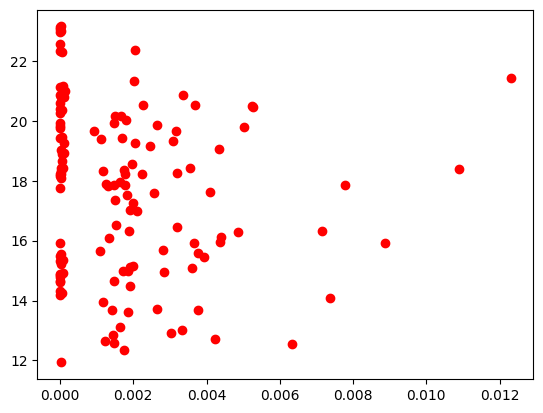

In [72]:
means = tweet_collection.groupby(['D'], as_index=False)['new_prob'].mean()
combined = means.merge(tsla_stock, how='inner')

print(combined['new_prob'].corr(combined['Close']))

import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)

# plot the data
ax.plot(combined['new_prob'],combined['Close'], 'ro')

In [73]:
def build_freqs(tweets, ys):
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            if pair in freqs:
                freqs[pair]+=1
            else:
                freqs[pair] =1
    return freqs
train_pos = training_set[training_set['Label'] == "positive"]
train_neg = training_set[training_set['Label'] == "negative"]

train_x = training_set['Tweet']
print(type(train_pos))
train_y = training_set['Label']
#<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [74]:
testing_set = test_set

In [75]:

testing_set['Tweet'] = testing_set['Tweet'].str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b',
                                          ' ')
testing_set['Tweet'] = testing_set['Tweet'].str.replace(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)',
                                          ' ')
testing_set['Tweet'] = testing_set['Tweet'].str.replace(r'£|\$', ' ')
testing_set['Tweet'] = testing_set['Tweet'].str.replace(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
                                          ' ')
testing_set['Tweet'] = testing_set['Tweet'].str.replace(r'\d+(\.\d+)?', ' ')

testing_set['Tweet'] = testing_set['Tweet'].str.replace(r'[^\w\d\s]', ' ')
testing_set['Tweet'] = testing_set['Tweet'].str.replace(r'\s+', ' ')
testing_set['Tweet'] = testing_set['Tweet'].str.replace(r'^\s+|\s+?$', '')

testing_set['Tweet'] = testing_set['Tweet'].str.lower()

In [76]:
testing_set['Tweet'] = testing_set['Tweet'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in set(stop_words))
)

In [77]:
lemmatizer = nltk.stem.WordNetLemmatizer()
testing_set['Tweet'] = testing_set['Tweet'].apply(lambda x: ' '.join(
    lemmatizer.lemmatize(term, pos='v') for term in x.split())
)

In [78]:
porter = nltk.PorterStemmer()
testing_set['Tweet'] = testing_set['Tweet'].apply(lambda x: ' '.join(
    porter.stem(term) for term in x.split())
)

In [79]:

testing_set['Tweet'] = testing_set['Tweet'].apply(lambda Tweet: nltk.word_tokenize(Tweet))

In [80]:

test_pos = testing_set[testing_set['Label'] == "positive"]
test_neg = testing_set[testing_set['Label'] == "negative"]

test_x = testing_set['Tweet']
test_y = testing_set['Label']

In [81]:
train_y[train_y == 'positive'] = 1
train_y[train_y == 'negative'] = 0

train_y0 = train_y.fillna(0)
train_y1 = train_y0.to_numpy()
train_y2 = []
for i in train_y1:
    train_y2.append([i])

train_y3 = np.array(train_y2)

<ipython-input-81-c13ee0ef601e>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_y0 = train_y.fillna(0)


In [82]:
test_y[test_y == 'positive'] = 1
test_y[test_y == 'negative'] = 0

test_y0 = test_y.fillna(0)

test_y1 = test_y0.to_numpy()
test_y2 = []
for i in test_y1:
    test_y2.append([i])

test_y3 = np.array(test_y2)

<ipython-input-82-7d7d75877d42>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_y0 = test_y.fillna(0)


In [83]:
freqs = build_freqs(train_x, train_y3)

print('Type of freqs : ', type(freqs))
print('Length of freqs : ', len(freqs))

Type of freqs :  <class 'dict'>
Length of freqs :  15403


In [84]:
def sigmoid(z):
    h = 1/(1+np.exp(-z))
    return h

In [85]:
def gradientDescent(x, y, theta, alp, iterations):
    m = x.shape[0]
    for i in range(iterations):
        z = np.dot(x, theta)
        h = sigmoid(z)

        j = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h)))

        theta = theta - (alp/m)* (np.dot(x.T, h-y))

    j = float(j)
    return j,theta

In [86]:
def extract_features(tweet, freqs):
    word_l = tweet
    x = np.zeros((1, 3))
    x[0, 0] = 1
    for word in word_l:
        x[0, 1] += freqs.get((word, 1), 0)
        x[0, 2] += freqs.get((word, 0), 0)
    assert(x.shape==(1, 3))
    return x

In [87]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :] = extract_features(train_x[i], freqs)

Y = train_y3

J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)

print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.57160044.
The resulting vector of weights is [5e-08, 5.555e-05, -4.955e-05]


<ipython-input-85-33725eaaa1c3>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  j = float(j)


In [88]:

def predict_tweet(tweet, freqs, theta):
    x = extract_features(tweet, freqs)
    y_pred = sigmoid(np.dot(x, theta))
    return y_pred

In [89]:
y_hat = []
def test_logistic_regression(test_x, test_y, feqs, theta):
    for tweet in test_x:
        y_pred = predict_tweet(tweet, freqs, theta)
        if y_pred >0.5:
            y_hat.append(1)
        else:
            y_hat.append(0)
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    return accuracy

accuracy = test_logistic_regression(test_x, test_y3, freqs, theta)
print('The accuracy of Logistic Regression is :', accuracy)

The accuracy of Logistic Regression is : 0.763


In [90]:
confusion_mat(test_y, y_hat)

		Classifier Prediction
			Positive	Negative
Actual | Positive	 0 		 0
Value  | Negative	 0 		 0


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, tree
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier

In [92]:
data = tweet_collection[:4997]

In [93]:
data['Label'] = data['Label'].map({
    'negative' : 0,
    'positive' : 1
    })

<ipython-input-93-4a21752e1be3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['Label'].map({


In [94]:
x = data["Tweet"]
y = data["Label"]

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [96]:

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [97]:
logistic_model = LogisticRegression(solver='liblinear', penalty='l1')
logistic_model.fit(xv_train, y_train)
pred = logistic_model.predict(xv_test)
score = accuracy_score(y_test,pred)
score

0.8448

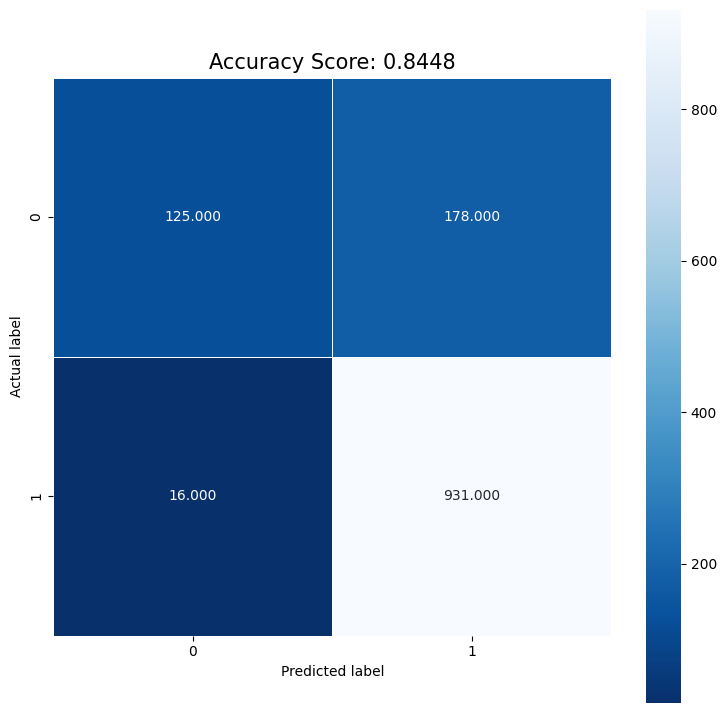

In [98]:
cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [99]:
clf1 = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=0).fit(xv_train, y_train)
pred1 = clf1.predict(xv_test)
gradientboosting_score = accuracy_score(y_test,pred1)
gradientboosting_score

0.808

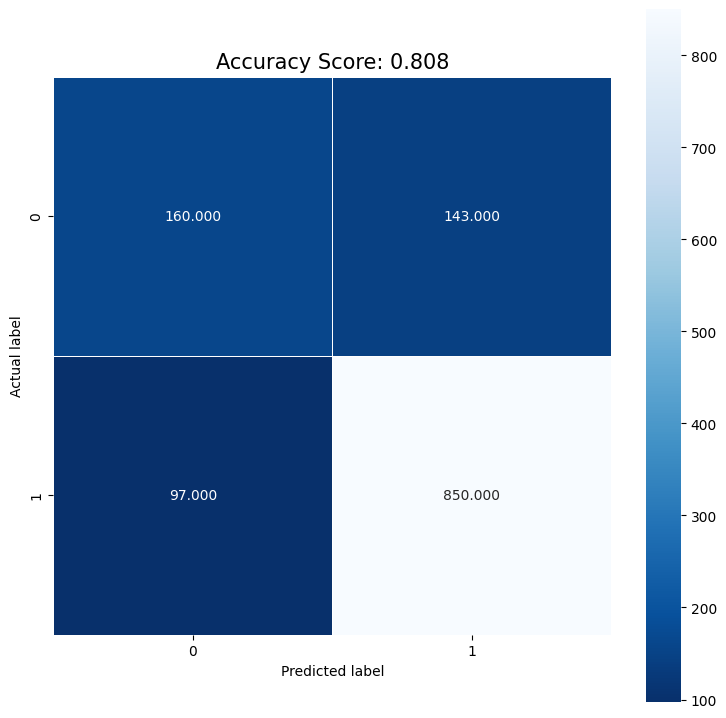

In [100]:
cm1 = metrics.confusion_matrix(y_test, pred1)
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(gradientboosting_score)
plt.title(all_sample_title, size = 15);

In [101]:
clf2 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2.fit(xv_train, y_train)
pred2 = clf2.predict(xv_test)
adaboost_score = accuracy_score(y_test,pred2)
adaboost_score

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8304

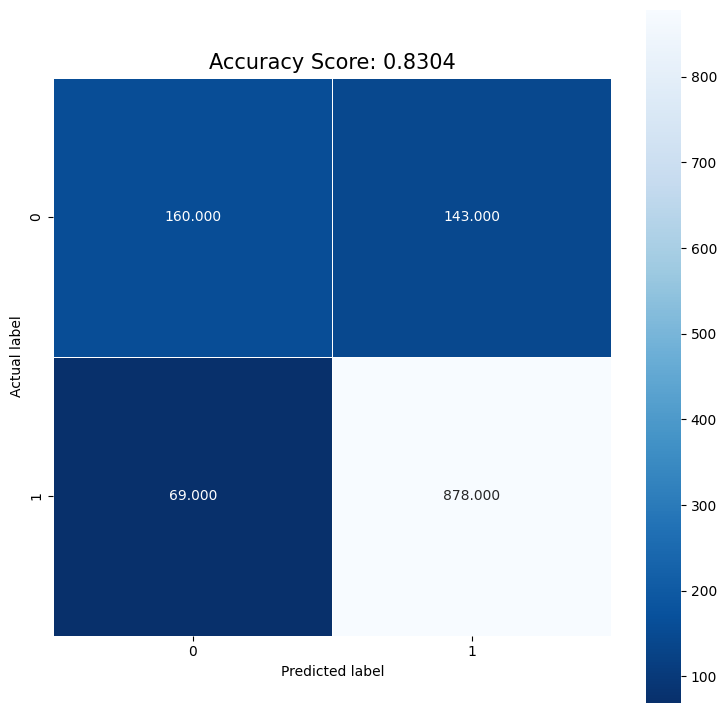

In [102]:
cm2 = metrics.confusion_matrix(y_test, pred2)
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(adaboost_score)
plt.title(all_sample_title, size = 15);

In [89]:
def prediction(x_test, model_object):
    y_pred = model_object.predict(xv_test)
    return y_pred

In [90]:
res = []
for i in range(1, 10):
    model_gini = DecisionTreeClassifier(criterion = "gini",
                random_state = 123,max_depth=i, min_samples_leaf=6)

    model_gini.fit(xv_train, y_train)

    y_pred_gini = prediction(xv_test, model_gini)
    res.append(accuracy_score(y_test,y_pred_gini)*100)
print("Accuracy for each depth from 1 to 10 using Gini", res)

Accuracy for each depth from 1 to 10 using Gini [79.44, 80.32000000000001, 80.88, 81.44, 81.76, 81.67999999999999, 81.92, 82.32000000000001, 82.48]


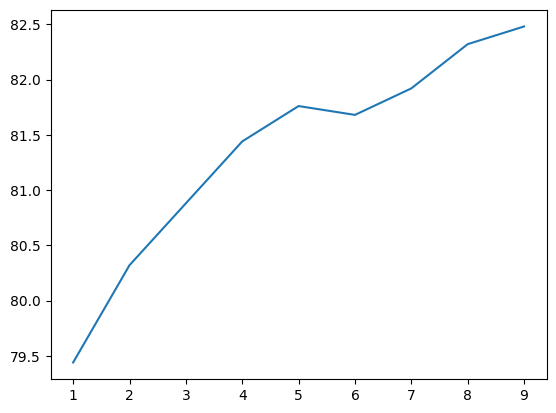

In [91]:
xpoints = range(1, 10)
plt.plot(xpoints, res)
plt.show()

In [92]:
res1 = []
for i in range(1, 10):
    model_entropy = DecisionTreeClassifier(
                criterion = "entropy", random_state = 123,
                max_depth = i, min_samples_leaf = 6)

    model_entropy.fit(xv_train, y_train)

    y_pred_entropy = prediction(xv_test, model_entropy)
    res1.append(accuracy_score(y_test, y_pred_entropy)*100)
print("Accuracy for each depth from 1 to 10 using Entropy", res1)

Accuracy for each depth from 1 to 10 using Entropy [79.44, 80.32000000000001, 80.88, 81.44, 81.76, 81.76, 81.92, 81.92, 82.48]


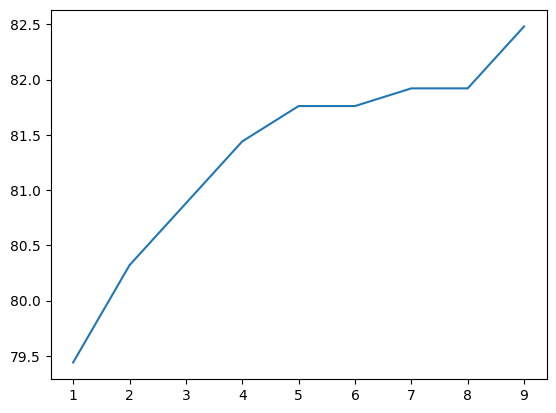

In [93]:
xpoints = range(1, 10)
plt.plot(xpoints, res1)
plt.show()

In [94]:
max_depth = [5, 6, 7, 8]
bag_size = [20, 40, 60, 80, 100]
terr_bag = []
terr_boo = []
for md in max_depth:
    for bs in bag_size:
        print("Bagging : max_depth =",md,"bag_size = ",bs)
        clf = BaggingClassifier(tree.DecisionTreeClassifier(random_state = 42, max_depth = md),n_estimators = bs)
        clf = clf.fit(xv_train, y_train)
        y_pred = clf.predict(xv_test)
        accuracy = accuracy_score(y_test,y_pred)
        print("Test Error = ", (1-accuracy)*100)
        terr_bag.append(accuracy)
        print("Confusion matrix: \n",confusion_matrix(y_test,y_pred))

max_depth = [5, 6, 7, 8]
bag_size = [20, 40, 60, 80, 100]
for md in max_depth:
    for bs in bag_size:
        print("AdaBoost : max_depth =",md,"bag_size = ",bs)
        clf = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state = 42, max_depth = md),n_estimators = bs)
        clf = clf.fit(xv_train, y_train)
        y_pred = clf.predict(xv_test)
        accuracy = accuracy_score(y_test,y_pred)
        print("Test Error = ", (1-accuracy)*100)
        terr_boo.append(accuracy)
        print("Confusion matrix: \n",confusion_matrix(y_test,y_pred))

Bagging : max_depth = 5 bag_size =  20
Test Error =  16.959999999999997
Confusion matrix: 
 [[ 71 197]
 [ 15 967]]
Bagging : max_depth = 5 bag_size =  40
Test Error =  17.36
Confusion matrix: 
 [[ 67 201]
 [ 16 966]]
Bagging : max_depth = 5 bag_size =  60
Test Error =  17.200000000000003
Confusion matrix: 
 [[ 67 201]
 [ 14 968]]
Bagging : max_depth = 5 bag_size =  80
Test Error =  17.200000000000003
Confusion matrix: 
 [[ 66 202]
 [ 13 969]]
Bagging : max_depth = 5 bag_size =  100
Test Error =  17.279999999999994
Confusion matrix: 
 [[ 65 203]
 [ 13 969]]
Bagging : max_depth = 6 bag_size =  20
Test Error =  16.959999999999997
Confusion matrix: 
 [[ 73 195]
 [ 17 965]]
Bagging : max_depth = 6 bag_size =  40
Test Error =  17.36
Confusion matrix: 
 [[ 67 201]
 [ 16 966]]
Bagging : max_depth = 6 bag_size =  60
Test Error =  17.36
Confusion matrix: 
 [[ 67 201]
 [ 16 966]]
Bagging : max_depth = 6 bag_size =  80
Test Error =  17.200000000000003
Confusion matrix: 
 [[ 69 199]
 [ 16 966]]
Bag

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  18.079999999999995
Confusion matrix: 
 [[133 135]
 [ 91 891]]
AdaBoost : max_depth = 5 bag_size =  40


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  19.679999999999996
Confusion matrix: 
 [[138 130]
 [116 866]]
AdaBoost : max_depth = 5 bag_size =  60


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  19.279999999999998
Confusion matrix: 
 [[128 140]
 [101 881]]
AdaBoost : max_depth = 5 bag_size =  80


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  19.599999999999994
Confusion matrix: 
 [[120 148]
 [ 97 885]]
AdaBoost : max_depth = 5 bag_size =  100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  17.679999999999996
Confusion matrix: 
 [[127 141]
 [ 80 902]]
AdaBoost : max_depth = 6 bag_size =  20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  21.919999999999995
Confusion matrix: 
 [[130 138]
 [136 846]]
AdaBoost : max_depth = 6 bag_size =  40


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  20.560000000000002
Confusion matrix: 
 [[116 152]
 [105 877]]
AdaBoost : max_depth = 6 bag_size =  60


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  19.520000000000003
Confusion matrix: 
 [[110 158]
 [ 86 896]]
AdaBoost : max_depth = 6 bag_size =  80


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  19.36
Confusion matrix: 
 [[109 159]
 [ 83 899]]
AdaBoost : max_depth = 6 bag_size =  100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  16.720000000000002
Confusion matrix: 
 [[121 147]
 [ 62 920]]
AdaBoost : max_depth = 7 bag_size =  20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  20.560000000000002
Confusion matrix: 
 [[140 128]
 [129 853]]
AdaBoost : max_depth = 7 bag_size =  40


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  19.199999999999996
Confusion matrix: 
 [[113 155]
 [ 85 897]]
AdaBoost : max_depth = 7 bag_size =  60


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  18.720000000000002
Confusion matrix: 
 [[105 163]
 [ 71 911]]
AdaBoost : max_depth = 7 bag_size =  80


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  17.200000000000003
Confusion matrix: 
 [[104 164]
 [ 51 931]]
AdaBoost : max_depth = 7 bag_size =  100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  16.879999999999995
Confusion matrix: 
 [[ 98 170]
 [ 41 941]]
AdaBoost : max_depth = 8 bag_size =  20


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  21.440000000000005
Confusion matrix: 
 [[124 144]
 [124 858]]
AdaBoost : max_depth = 8 bag_size =  40


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  19.199999999999996
Confusion matrix: 
 [[100 168]
 [ 72 910]]
AdaBoost : max_depth = 8 bag_size =  60


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  17.600000000000005
Confusion matrix: 
 [[ 99 169]
 [ 51 931]]
AdaBoost : max_depth = 8 bag_size =  80


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  17.12
Confusion matrix: 
 [[ 95 173]
 [ 41 941]]
AdaBoost : max_depth = 8 bag_size =  100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Error =  16.879999999999995
Confusion matrix: 
 [[ 91 177]
 [ 34 948]]


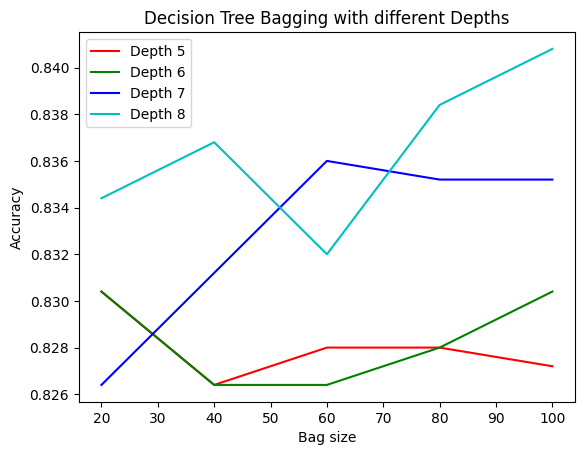

In [95]:
bags = np.array([20, 40, 60, 80, 100])
depth5 = terr_bag[:5]
depth6 = terr_bag[5:10]
depth7 = terr_bag[10:15]
depth8 = terr_bag[15:20]

plt.plot(bags, depth5, color='r', label='Depth 5')
plt.plot(bags, depth6, color='g', label='Depth 6')
plt.plot(bags, depth7, color='b', label='Depth 7')
plt.plot(bags, depth8, color='c', label='Depth 8')

plt.xlabel("Bag size")
plt.ylabel("Accuracy")
plt.title("Decision Tree Bagging with different Depths")

plt.legend()
plt.show()

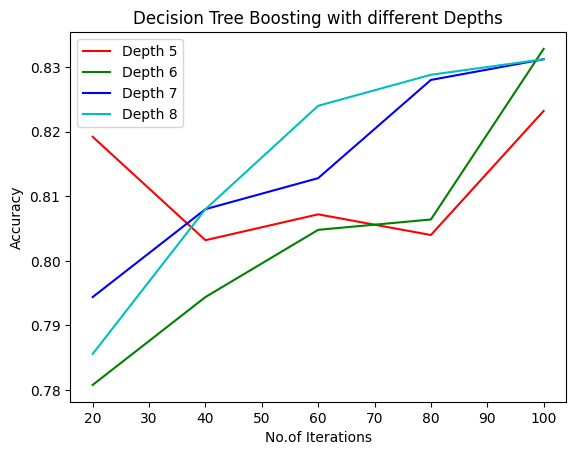

In [96]:
bags = np.array([20, 40, 60, 80, 100])
depth5 = terr_boo[:5]
depth6 = terr_boo[5:10]
depth7 = terr_boo[10:15]
depth8 = terr_boo[15:20]

plt.plot(bags, depth5, color='r', label='Depth 5')
plt.plot(bags, depth6, color='g', label='Depth 6')
plt.plot(bags, depth7, color='b', label='Depth 7')
plt.plot(bags, depth8, color='c', label='Depth 8')

plt.xlabel("No.of Iterations")
plt.ylabel("Accuracy")
plt.title("Decision Tree Boosting with different Depths")

plt.legend()
plt.show()

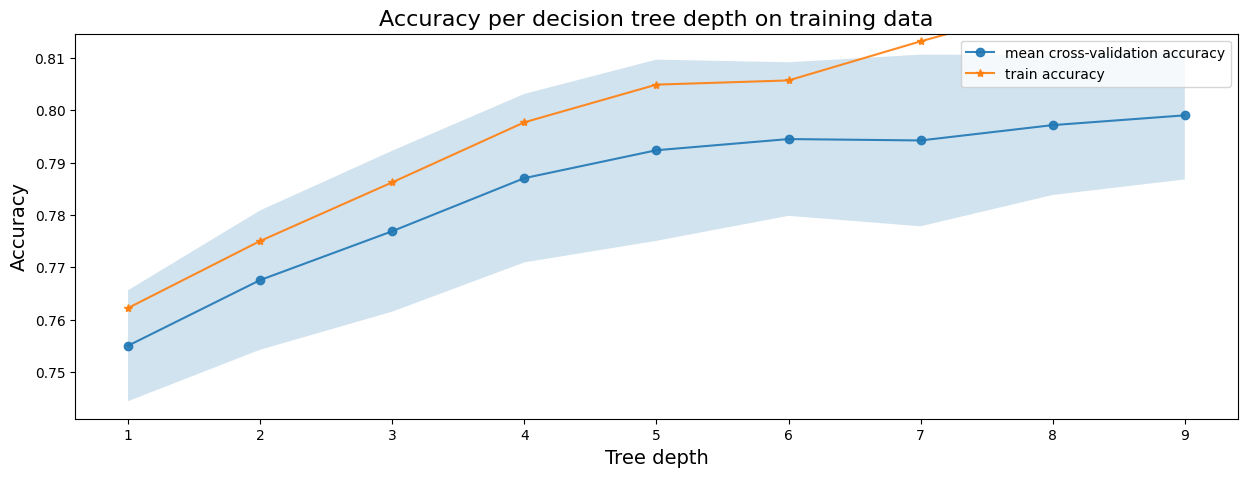

In [97]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

sm_tree_depths = range(1,10)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(xv_train, y_train, sm_tree_depths)

plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 'Accuracy per decision tree depth on training data')

In [98]:
rfc = RandomForestClassifier(random_state=4)

rfc.fit(xv_train,y_train)

print("Train Results \n")
y_train_pred  = rfc.predict(xv_train)
y_train_prob = rfc.predict_proba(xv_train)[:,1]

print("Confusion Matrix for Train : \n", confusion_matrix(y_train, y_train_pred))
print("Accuracy Score for Train : ", accuracy_score(y_train, y_train_pred))

print("+"*50)
print("Test Results \n")
y_test_pred  = rfc.predict(xv_test)
y_test_prob = rfc.predict_proba(xv_test)[:,1]

print("Confusion Matrix for Test : \n", confusion_matrix(y_test, y_test_pred))
print("Accuracy Score for Test : ", accuracy_score(y_test, y_test_pred))

Train Results 

Confusion Matrix for Train : 
 [[ 947    0]
 [   0 2800]]
Accuracy Score for Train :  1.0
++++++++++++++++++++++++++++++++++++++++++++++++++
Test Results 

Confusion Matrix for Test : 
 [[102 166]
 [ 20 962]]
Accuracy Score for Test :  0.8512


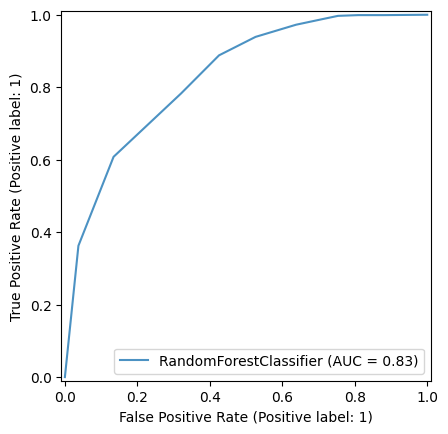

In [99]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(xv_train, y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc,xv_test, y_test, ax=ax, alpha=0.8)
plt.show()